# Predicting objects from cifar10 Dataset

### Importing dataset from Tensorflow

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
dataset = tfds.load('cifar10')
train, test = dataset['train'], dataset['test']

train_numpy = np.vstack(tfds.as_numpy(train))
test_numpy = np.vstack(tfds.as_numpy(test))

X_train = np.array(list(map(lambda x: x[0]['image'], train_numpy)))
y_train = np.array(list(map(lambda x: x[0]['label'], train_numpy)))

X_test = np.array(list(map(lambda x: x[0]['image'], test_numpy)))
y_test = np.array(list(map(lambda x: x[0]['label'], test_numpy)))

/Users/prithvikewalramani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  after removing the cwd from sys.path.
/Users/prithvikewalramani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


### Performing Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
	rescale=1/255
)
validation_datagen = ImageDataGenerator(
	rescale=1/255
)


In [4]:
train_generator= train_datagen.flow(
        X_train,
        y_train, 
        batch_size=200)

validation_generator = validation_datagen.flow(
        X_train,
        y_train, 
        batch_size=100)



In [5]:
from tensorflow.keras.layers import *

### Creating Model

In [6]:
model=tf.keras.Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [8]:
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics=['accuracy'])


In [9]:
history=model.fit_generator(
	train_generator,
	steps_per_epoch=50,
	epochs=100,
	validation_data=validation_generator,
	validation_steps=40
	)


Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/100
50/50 [==============================] - 23s 452ms/step - loss: 2.1026 - accuracy: 0.2220 - val_loss: 1.9232 - val_accuracy: 0.2885
Epoch 2/100
50/50 [==============================] - 21s 427ms/step - loss: 1.7611 - accuracy: 0.3603 - val_loss: 1.7474 - val_accuracy: 0.3590
Epoch 3/100
50/50 [==============================] - 20s 409ms/step - loss: 1.6032 - accuracy: 0.4140 - val_loss: 1.5813 - val_accuracy: 0.4190
Epoch 4/100
50/50 [==============================] - 18s 368ms/step - loss: 1.5277 - accuracy: 0.4394 - val_loss: 1.4638 - val_accuracy: 0.4610
Epoch 5/100
50/50 [==============================] - 21s 413ms/step - loss: 1.4352 - accuracy: 0.4780 - val_loss: 1.4114 - val_accuracy: 0.4990
Epoch 6/100
50/50 [==============================] - 18s 363ms/step - loss: 1.3816 - accuracy: 0.5016 - val_loss: 1.3645 - val_accuracy: 0.5098
Epoch 7/100
50/50 [==============================] - 19s 370ms/step - loss: 1.3230 - accuracy: 0.5199 - val_loss: 1.3060 - val_accuracy:

50/50 [==============================] - 17s 340ms/step - loss: 0.6851 - accuracy: 0.7581 - val_loss: 0.6755 - val_accuracy: 0.7602
Epoch 58/100
50/50 [==============================] - 17s 343ms/step - loss: 0.6804 - accuracy: 0.7587 - val_loss: 0.6654 - val_accuracy: 0.7670
Epoch 59/100
50/50 [==============================] - 17s 348ms/step - loss: 0.6528 - accuracy: 0.7766 - val_loss: 0.6806 - val_accuracy: 0.7663
Epoch 60/100
50/50 [==============================] - 18s 353ms/step - loss: 0.6653 - accuracy: 0.7668 - val_loss: 0.6805 - val_accuracy: 0.7540
Epoch 61/100
50/50 [==============================] - 17s 335ms/step - loss: 0.6659 - accuracy: 0.7658 - val_loss: 0.7206 - val_accuracy: 0.7470
Epoch 62/100
50/50 [==============================] - 17s 335ms/step - loss: 0.6584 - accuracy: 0.7689 - val_loss: 0.6477 - val_accuracy: 0.7742
Epoch 63/100
50/50 [==============================] - 17s 334ms/step - loss: 0.6598 - accuracy: 0.7651 - val_loss: 0.6453 - val_accuracy: 0.778

### Model has been trained. Some examples below

In [10]:
import matplotlib.pyplot as plt

In [11]:
p=[np.random.randint(10000) for q in range(11)]

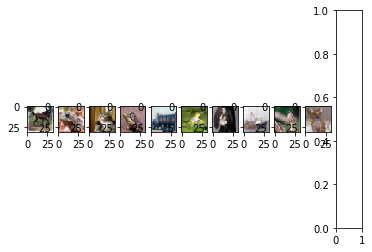

In [12]:
# Displaying 10 random handwritten images in the test dataset

j=0
for i in p: 
    j+=1
    plt.imshow(X_test[i].reshape([32, 32, 3]));
    plt.subplot(1, 11, j)
plt.show()

In [13]:
# Actual values of the data in the test dataset

values=[]
for i in p[1:]:
    values.append(y_test[i])
print(values)

[7, 6, 3, 6, 9, 6, 5, 8, 2, 5]


In [14]:
# Predictions performed by the trained model

predictions=[]
for i in p[1:]:
    predictions.append(list(model.predict(X_test)[i]).index(1))
print(predictions)

[7, 0, 3, 0, 9, 5, 7, 8, 5, 7]
